In [1]:
import pandas as pd

In [2]:
!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [6]:
len(X_test)

10000

In [7]:
len(y_train)

60000

In [11]:
X_train[0].shape

(28, 28)

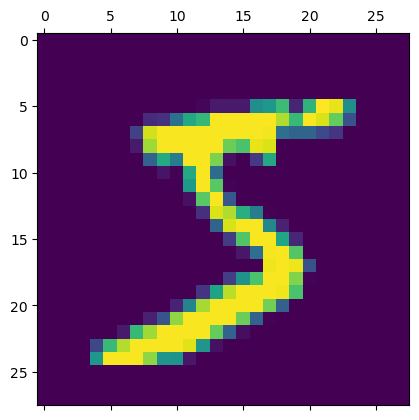

In [16]:
plt.matshow(X_train[0])

In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
28*28

784

In [27]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [29]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 9s 4ms/step - loss: 0.4675 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3033 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9258


In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2689 - accuracy: 0.9259


[0.26892948150634766, 0.9258999824523926]

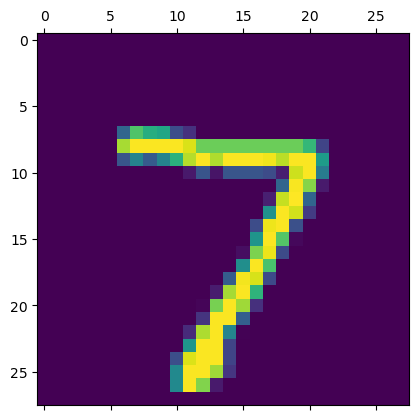

In [32]:
plt.matshow(X_test[0])

In [33]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.4828045e-02, 4.2534435e-07, 5.7981931e-02, 9.4886220e-01,
       3.6846395e-03, 1.5225375e-01, 2.0307714e-06, 9.9966532e-01,
       7.4581854e-02, 6.8748343e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0])

7

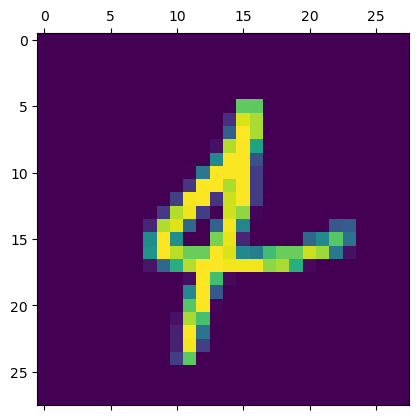

In [35]:
plt.matshow(X_test[300])

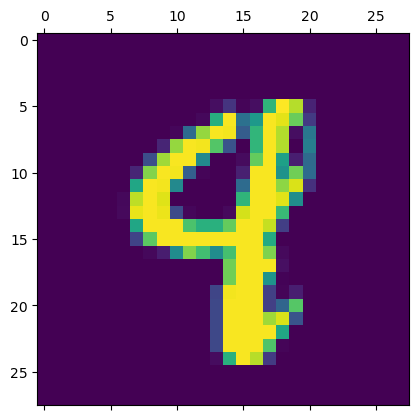

In [51]:
plt.matshow(X_test[359])

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted[300]

313/313 [==============================] - 1s 3ms/step


array([0.00068761, 0.09359302, 0.08519366, 0.03969362, 0.17691694,
       0.06503968, 0.37349483, 0.02444994, 0.05026157, 0.06857581],
      dtype=float32)

In [52]:
np.argmax(y_predicted[359])

4

In [41]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  946,   12,   10,    4,   13,    8,   21,    4],
       [   3,    0,   24,  922,    1,   24,    2,    9,   16,    9],
       [   1,    1,    3,    1,  929,    0,   11,    3,    5,   28],
       [  10,    3,    5,   29,   14,  781,   18,    2,   25,    5],
       [  11,    3,    6,    1,    7,   12,  915,    2,    1,    0],
       [   1,    7,   26,    8,   12,    1,    0,  929,    1,   43],
       [   7,   12,   11,   25,   11,   33,   11,    8,  842,   14],
       [  11,    7,    1,   10,   42,    8,    0,   11,    3,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

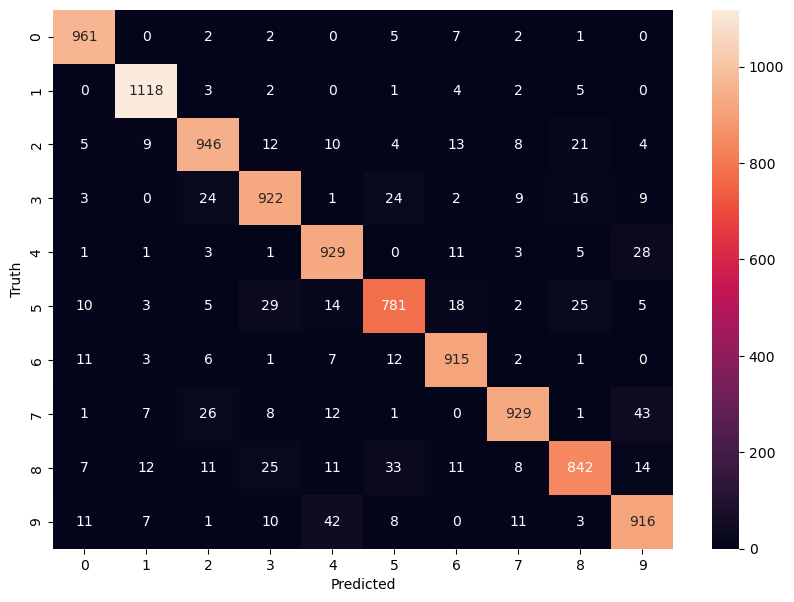

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2757 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1223 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0854 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9843


In [54]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0884 - accuracy: 0.9726


[0.08840176463127136, 0.972599983215332]

313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

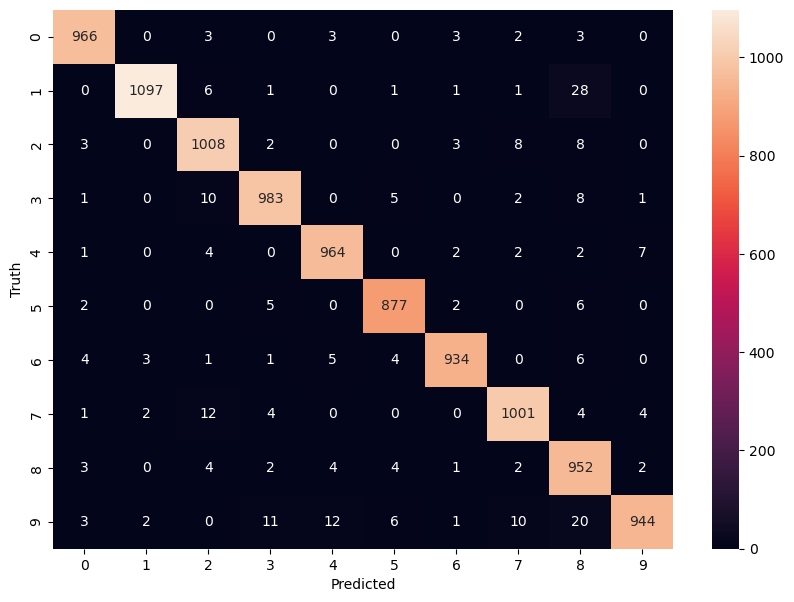

In [55]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')